In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mglearn

from IPython.display import display

%matplotlib inline

In [56]:
pd.options.display.max_rows = 15
original_df = pd.read_csv('train.csv', index_col='PassengerId')
original_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S


Нека видим какви типове данни имаме в dataset-а

In [57]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Очевидно имаме доста малко данни

Нека да видим какво се случва във feature-а, 'Age'

Нека да видим какво се случва във feature-а, 'Age'

In [58]:
mod_frame = original_df
mod_frame.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [59]:
mod_frame.Age.isna().sum()

177

забелязваме, че имаме доста голямо стандартно отклонение и сравнително голям брой липсващи възрасти, трябва да ги запълним

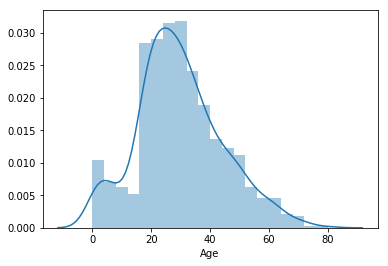

In [60]:
sns.distplot(mod_frame['Age'].dropna().astype(int))

Видяхме какво е разпределението на Age, за текущите стойности, ще пробваме да запълним липсващите такива, като се стараем да не променяме разпределението

c:\users\momch\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


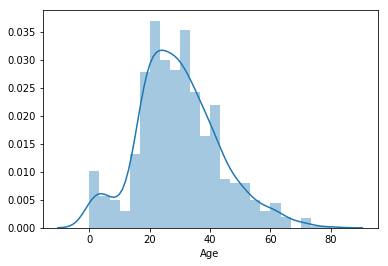

In [61]:
averageAge   = mod_frame["Age"].mean()
stdAge       = mod_frame["Age"].std()
countAge = mod_frame["Age"].isnull().sum()

randomAges = np.random.randint(averageAge - stdAge, averageAge + stdAge, size = countAge)
mod_frame["Age"][np.isnan(mod_frame["Age"])] = randomAges
sns.distplot(mod_frame['Age'].dropna().astype(int))

Разпределението се запази, горе долу същото, като запълнихме липсващите стойности с интервал [avAge - std, avAge + std]

Нека сега разгледаме колко са оцелелие

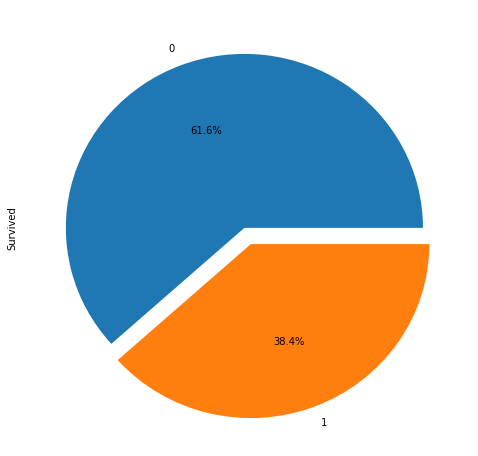

In [62]:
mod_frame['Survived'].value_counts().plot.pie(explode=[0, 0.1], figsize=(8, 8), autopct='%1.1f%%');

Нека сега да видим, спрямо възрастта как стоят нещата

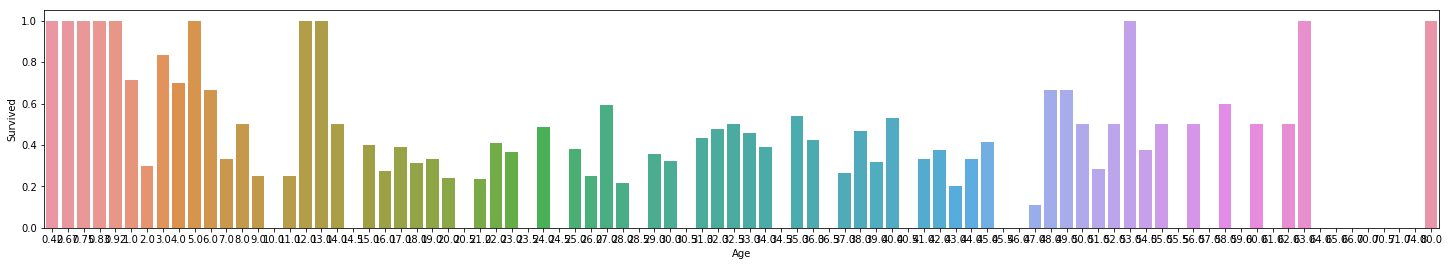

In [63]:
fig, axis1 = plt.subplots(1,1,figsize=(25,4))
average_age_group = mod_frame[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age_group)

Виждаме, че най-много оцелели има деца и възрастни хора


Нека да видим дали има корелация между пола и това дали са оцелели:

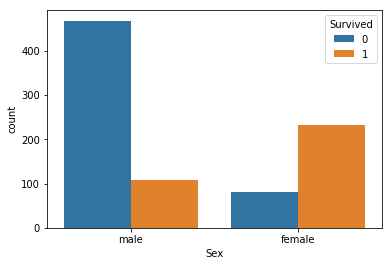

In [64]:
sns.countplot('Sex', hue='Survived', data=mod_frame);

Ок виждаме, че смъртността на мъжете е по-голяма

В момента заблязваме разделение на мъже и жени. Ще е хубаво обаче ако добавим и децата към това разделение

In [65]:
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex

mod_frame['Person'] = mod_frame[['Age','Sex']].apply(get_person,axis=1)
mod_frame['Person'] = mod_frame[['Age','Sex']].apply(get_person,axis=1)

Ще one-hot-encode-нем селската, за да може да продължаваме да си гледаме dataset-а

In [66]:
mod_frame['Child'] = (mod_frame.Person == 'child').astype(float)
mod_frame['Female'] = (mod_frame.Person == 'female').astype(float)

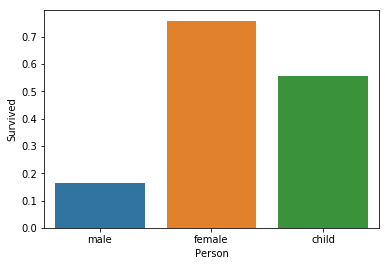

In [67]:
person_perc = mod_frame[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=person_perc, order=['male','female','child'])

mod_frame.drop(['Person', 'Sex'],axis=1,inplace=True)

Вижда се, че смъртността на мъжете е доста по-голяма. На децата също е по-голяма от тази на жените по обясними причини, например може да са премръзнали да не са се приентирали добре в паниката, да са твърде малки и да не могат да се справят с препятствията и пр.

Изключихме мъжете от новосъздадените feature-и, понеже това смъртността им е твърде голяма

Ще обединим също колонките 'Parch' и 'SibSp', за да намерим общия брой роднини на данен, човек, след което ще превърнем колонката в категориина, като искаме да знаем дали, човека на кораба има някой роднина


c:\users\momch\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


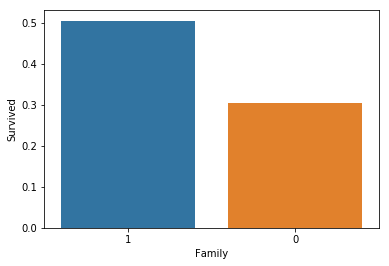

In [68]:
mod_frame['Family'] =  mod_frame["Parch"] + mod_frame["SibSp"]
mod_frame['Family'].loc[mod_frame['Family'] > 0] = 1
mod_frame['Family'].loc[mod_frame['Family'] == 0] = 0

family_perc = mod_frame[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=family_perc, order=[1,0])

mod_frame.drop(['SibSp','Parch'], axis=1,inplace=True)

Embarked:

2


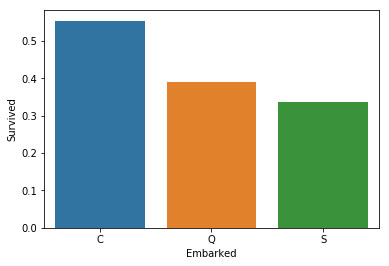

In [69]:
embark_perc = mod_frame[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc)

print(mod_frame.Embarked.isna().sum())
mod_frame["Embarked"] = mod_frame["Embarked"].fillna("S")

mod_frame['C'] = (mod_frame.Embarked == 'C').astype(float)
mod_frame['Q'] = (mod_frame.Embarked == 'C').astype(float)

mod_frame.drop(['Embarked'], axis=1,inplace=True)

Смъртността в S е най-голяма поради тази причина не сме го добавили като feature в горния код

Нека сега разгледаме класата:

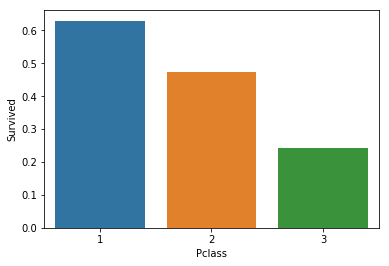

In [70]:
class_perc = mod_frame[["Pclass", "Survived"]].groupby(['Pclass'],as_index=False).mean()
sns.barplot(x='Pclass', y='Survived', data=class_perc)

mod_frame['Cl1'] = (mod_frame.Pclass == 1).astype(float)
mod_frame['Cl2'] = (mod_frame.Pclass == 2).astype(float)

mod_frame.drop(['Pclass'], axis=1,inplace=True)

Отново виждаме, нещо подобно и очаквано, смъртността е най-висока при хората пърували в 3-та класа

Нека сега си съставим нашия модел

In [71]:

model = mod_frame.drop(['Name','Ticket', 'Fare', 'Cabin'], axis=1)

In [72]:
y = model['Survived']
x = model.drop('Survived', axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, stratify=y)

In [73]:
for df in [X_train, X_test, y_train, y_test]:
    print(df.shape)

(668, 8)
(223, 8)
(668,)
(223,)


In [74]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(random_state=144, n_estimators = 100, max_depth = 4).fit(X_train, y_train)
print("train score:", regressor.score(X_train, y_train))
print("test score: ", regressor.score(X_test, y_test))

train score: 0.836826347305
test score:  0.789237668161


Сега ще си добвавим титлите като нов feature в Dataset-a

In [75]:
model = mod_frame.drop(['Ticket', 'Fare', 'Cabin'], axis=1)

model['Title'] = model.Name.str.extract('([A-Za-z]+)\.', expand=False)
model.loc[model.Title == 'Mlle', 'Title'] = 'Miss'
model.loc[model.Title == 'Mme', 'Title']  = 'Mrs'
model.loc[model.Title == 'Ms', 'Title']   = 'Miss'

rare_titles = ['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Don', 'Jonkheer', 'Capt', 'Lady', 'Sir']
model.Title = model.Title.replace(rare_titles, 'Rare')

model['Miss'] = ((model.Title == 'Miss') | (model.Title == 'Mlle')).astype(float)
model['Mrs'] = (model.Title == 'Mrs').astype(float)
model['Rare'] = (model.Title == 'Rare').astype(float)
model.drop(['Title', 'Name'], axis=1, inplace=True)

y = model['Survived']
x = model.drop('Survived', axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, stratify=y)

Нека пробваме с Random Forest класификатор

In [76]:
rr = RandomForestClassifier().fit(X_train, y_train)
print("train score:", rr.score(X_train, y_train))
print("test score: ", rr.score(X_test, y_test))

train score: 0.923652694611
test score:  0.735426008969


Овърфитваме. Ще greed-search-нем

In [77]:
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(rr, {'n_estimators': [10, 30, 50, 70, 100],
                              'max_depth': [2, 4, 6, 8, 10, 12, 15]})
search.fit(x, y)

pd.DataFrame(search.cv_results_)[['rank_test_score', 'mean_test_score', 'params']].sort_values(by='rank_test_score').head(10)

c:\users\momch\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\momch\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\momch\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.wa

,rank_test_score,mean_test_score,params
11,1,0.806958,"{'max_depth': 6, 'n_estimators': 30}"
9,2,0.803591,"{'max_depth': 4, 'n_estimators': 100}"
6,2,0.803591,"{'max_depth': 4, 'n_estimators': 30}"
5,4,0.801347,"{'max_depth': 4, 'n_estimators': 10}"
17,5,0.800224,"{'max_depth': 8, 'n_estimators': 50}"
14,6,0.799102,"{'max_depth': 6, 'n_estimators': 100}"
19,7,0.797980,"{'max_depth': 8, 'n_estimators': 100}"
12,7,0.797980,"{'max_depth': 6, 'n_estimators': 50}"
18,9,0.796857,"{'max_depth': 8, 'n_estimators': 70}"
15,9,0.796857,"{'max_depth': 8, 'n_estimators': 10}"


In [78]:
rr = RandomForestClassifier(n_estimators = 30, max_depth = 4).fit(X_train, y_train)
print("train score:", rr.score(X_train, y_train))
print("test score: ", rr.score(X_test, y_test))

train score: 0.809880239521
test score:  0.757847533632


Виждаме, че резултата ни не се подобрява. Накрая, ще пробваме и какво ще се получи като пуснем едно SCV

In [79]:
from sklearn.svm import SVC

svckl = SVC().fit(X_train,y_train)
print("train score:", svckl.score(X_train, y_train))
print("test score: ", svckl.score(X_test, y_test))

train score: 0.820359281437
test score:  0.780269058296
